<a href="https://colab.research.google.com/github/riskakurniaa/Machine-Learning/blob/Jobsheet7/Praktikum1_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : **Riska Kurnia Triwulandari**  
Kelas : **3A**  
NIM   : **2241720039**

###Praktikum 1 - KMeans
KMeans adalah satu metode unsupervised learning pada machine learning. Metode ini menentukan jumlah cluster sesuai dengan jumlah k yang dipilih. Proses KMeans secara manual, dapat dilihat pada tautan berikut,

https://docs.google.com/spreadsheets/d/16C2HxTFicQ5tS7aXc1Uvlu1kyvk20LSA_P-E2p47kLY/edit?usp=sharing

Pada modul jobsheet ini, kita akan langsung mempraktikkan pembuatan model KMeans dengan menggunakan python. Untuk modul pertama ini, kita akan menggunakan contoh kasus yang sederhana, yaitu dengan menggunakan dataset iris. Sedangkan untuk modul kedua, kita akan melakukan clustering dengan lebih advance, yaitu reduksi warna dengan data gambar

In [5]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

# Menampilkan hasil
print("Fitur (X):")
print(X)
print("\nTarget (y):")
print(y)

Fitur (X):
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

Target (y):
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iri



*   X: Variabel X dipilih dari kolom 1 hingga kolom ke-4 dari dataframe (tanpa kolom Id dan Species).

*   y: y adalah kolom terakhir, yaitu Species, yang berisi label asli untuk masing-masing spesies bunga.



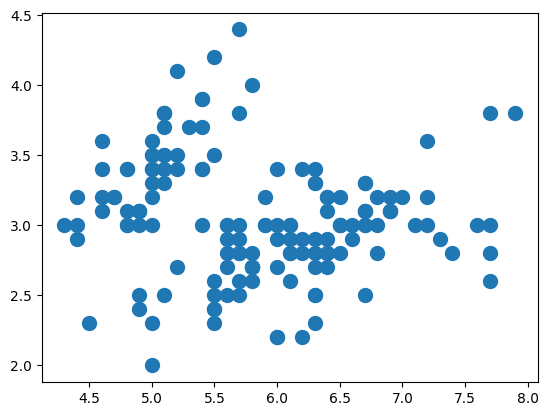

In [7]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

*   Menampilkan scatter plot dari fitur Sepal Length (kolom 0) dan Sepal Width (kolom 1).
*   s = 100 mengatur ukuran setiap titik pada plot.
*   Karena data Iris terdiri dari 4 dimensi (Sepal Length, Sepal Width, Petal Length, Petal Width), visualisasi dibatasi hanya pada dua dimensi.





In [8]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

- Inisialisasi model K-Means dengan n_clusters=2, artinya diasumsikan akan ada 2 cluster di dalam data.
- Melakukan fit (pelatihan) dan predict (prediksi) terhadap data X. Hasil prediksi (y_kmeans) berupa label cluster dari setiap titik data berdasarkan K-Means.

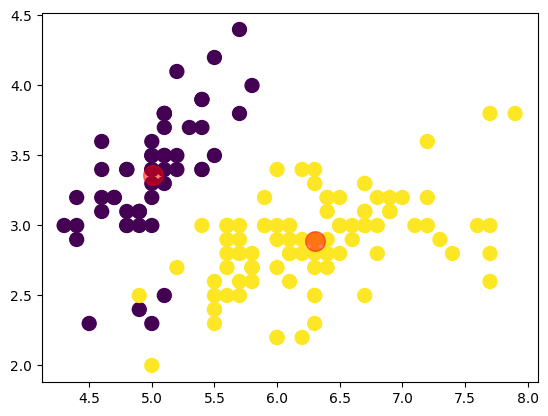

In [9]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [10]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


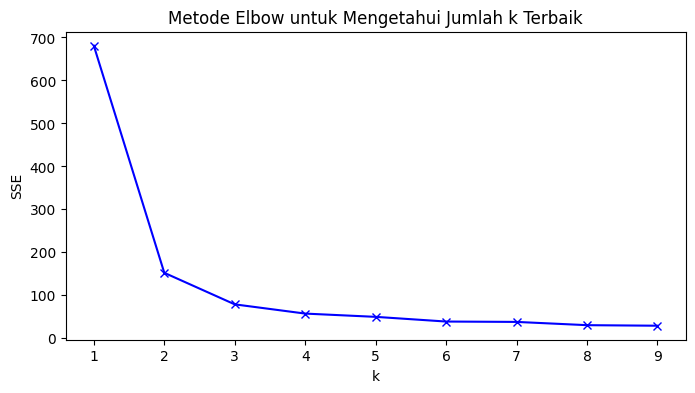

In [12]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [13]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.4732732654949
k=5; SSE=49.86865426388461
k=6; SSE=38.95701115711987
k=7; SSE=38.09811433172303
k=8; SSE=30.517136363636382
k=9; SSE=29.23454386299976
